# AMATH Scientific Computing
## Homework-1
### Manjaree Binjolkar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy
import csv
from copy import deepcopy
%matplotlib inline

In [2]:
## Problem 1
f = lambda t, y: -3*y*np.sin(t)
y_0 = np.pi/np.sqrt(2)
y_true = lambda t: np.pi*np.exp(3*(np.cos(t) - 1))/np.sqrt(2)

# a - Forward Euler
def forward_euler(f, t, y0):
    dt = t[2] - t[1]
    y = np.zeros(len(t))
    y[0] = y0
    for k in range(len(y)-1):
        y[k+1] = y[k] + dt*f(t[k], y[k])
        
    return y

#initialising
dt_FE = 2**(-np.linspace(2, 8, 7))
err_FE = np.zeros(len(dt_FE))

for k, dt in enumerate(dt_FE):
    N = int(5/dt);
    t = np.linspace(0, 5, N+1)
    #t = np.arange(0, 5+dt, dt)
    y = forward_euler(f, t, y_0)
    err_FE[k] = np.abs(y[-1] - y_true(5))

pfit = np.polyfit(np.log(dt_FE), np.log(err_FE), 1)

In [3]:
# b - Heun's method
def heun(f, t, y_0):
    dt = t[2]-t[1]
    y = np.zeros(len(t))
    y[0] = y_0
    for k in range(len(y)-1):
        y[k+1] = y[k] + 0.5*dt*(f(t[k], y[k]) + f(t[k+1], y[k]+dt*f(t[k], y[k])) )
    return y

#initialising
dt_He = 2**(-np.linspace(2, 8, 7))
err_He = np.zeros(len(dt_He))

for k, dt in enumerate(dt_He):
    t = np.arange(0, 5+dt, dt)
    yh = heun(f, t, y_0)
    err_He[k] = np.abs(yh[-1] - y_true(5))

pfit2 = np.polyfit(np.log(dt_He), np.log(err_He), 1)

In [4]:
# Adams predictor-corrector method
def adam(f, t, y_0):
    #initialising
    dt = t[2]-t[1]
    y = np.zeros(len(t))
    y[0] = y_0
    y[1] = y_0 + dt*f(t[0] + dt/2, y_0 + 0.5*dt*f(t[0], y_0))
    #loop for calculating next time steps
    for k in range(1,len(y)-1):
        yp = y[k] + 0.5*dt*(3*f(t[k], y[k]) - f(t[k-1], y[k-1]))
        y[k+1] = y[k] + 0.5*dt*(f(t[k+1], yp) + f(t[k], y[k]) )
    return y

#initialising
dt_APC = 2**(-np.linspace(2, 8, 7))
err_APC = np.zeros(len(dt_APC))

for k, dt in enumerate(dt_APC):
    t = np.arange(0, 5+dt, dt)
    y = adam(f, t, y_0)
    err_APC[k] = np.abs(y[-1] - y_true(5))

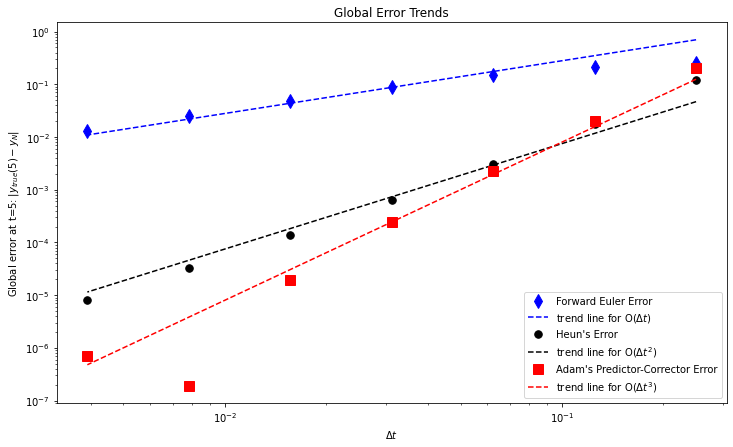

In [5]:
#Plotting the functions

fig, ax = plt.subplots(figsize=(12,7))
#Forward Euler
ax.loglog(dt_FE, err_FE, 'bd', markersize=10, label='Forward Euler Error')
ax.loglog(dt_FE, 2.8*dt_FE, 'b--', label=r'trend line for O($\Delta t$)')
#Heun's method
ax.loglog(dt_He, err_He, 'k.', markersize=15, markerfacecolor='k', label="Heun's Error")
ax.loglog(dt_He, 0.75*dt_He**2, 'k--', label=r'trend line for O($\Delta t^2$)')
#Adams Predictor Corrector Method
ax.loglog(dt_APC, err_APC, 'rs', markersize=10, markerfacecolor='r', label="Adam's Predictor-Corrector Error")
ax.loglog(dt_APC, 8*dt_APC**3, 'r--', label=r'trend line for O($\Delta t^3$)')
ax.legend(loc='best')
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel(r'Global error at t=5: $|y_{true}(5) - y_N|$')
ax.set_title('Global Error Trends')

fig.savefig('hw1_trend_lines.png')
plt.show()

In [9]:
## Problem 3
# initializing
tvals = np.arange(0, 100+0.5, 0.5)
#a1, a2, b, c, I = 0.05, 0.25, 0.1, 0.1, 0.1
a1 = 0.05
a2 = 0.25
b = 0.1
c = 0.1
I = 0.1

dv1dt = lambda v1, w1, v2, w2, d12: -v1**3 + (1+a1)*v1**2 - a1*v1 - w1 + I + d12*v2
dw1dt = lambda v1, w1, v2, w2: b*v1 - c*w1
dv2dt = lambda v1, w1, v2, w2, d21: -v2**3 + (1+a2)*v2**2 - a2*v2 - w2 + I + d21*v1
dw2dt = lambda v1, w1, v2, w2: b*v2 - c*w2

dydt = lambda t, y, d12, d21: np.array([dv1dt(y[0], y[1], y[2], y[3], d12),
                          dw1dt(y[0], y[1], y[2], y[3]),
                          dv2dt(y[0], y[1], y[2], y[3], d21),
                          dw2dt(y[0], y[1], y[2], y[3])
                         ])

y0 = np.array([0.1, 0, 0.1, 0])
args_list = [[0, 0], [0, 0.2], [-0.1, 0.2], [-0.3, 0.2], [-0.5, 0.2] ]
#print(args_list[1])

sol0 = scipy.integrate.solve_ivp(dydt, [tvals[0], tvals[-1]], y0,method='BDF', args=args_list[0], t_eval=tvals)
sol1 = scipy.integrate.solve_ivp(dydt, [tvals[0], tvals[-1]], y0, method='BDF', args=args_list[1], t_eval=tvals)
sol2 = scipy.integrate.solve_ivp(dydt, [tvals[0], tvals[-1]], y0, method='BDF', args=args_list[2], t_eval=tvals)
sol3 = scipy.integrate.solve_ivp(dydt, [tvals[0], tvals[-1]], y0, method='BDF', args=args_list[3], t_eval=tvals)
sol4 = scipy.integrate.solve_ivp(dydt, [tvals[0], tvals[-1]], y0, method='BDF', args=args_list[4], t_eval=tvals)

#A14 = (sol0.y[(0, 2, 1, 3), :]).T
#A15 = (sol1.y[(0, 2, 1, 3), :]).T
#A16 = (sol2.y[(0, 2, 1, 3), :]).T
#A17 = (sol3.y[(0, 2, 1, 3), :]).T
#A18 = (sol4.y[(0, 2, 1, 3), :]).T

#np.shape(A14)

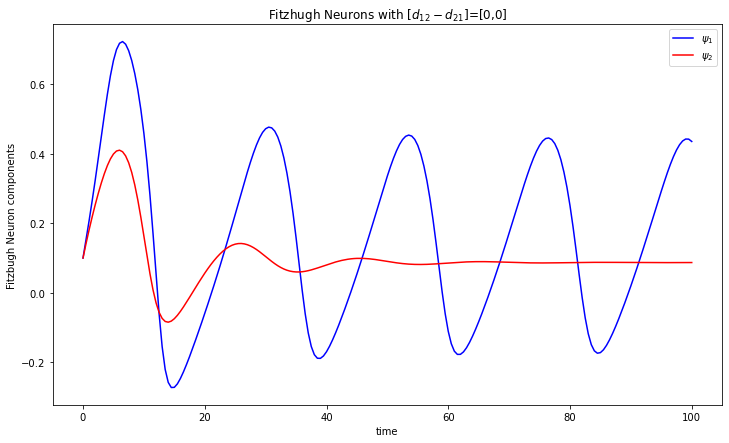

In [12]:
#Plotting the functions

fig, ax = plt.subplots(figsize=(12,7))

plt.plot(sol0.t, sol0.y[0],'b', label = "$\psi_1$")
plt.plot(sol0.t, sol0.y[2],'r', label = "$\psi_2$")


ax.legend(loc='best')
ax.set_xlabel(r'time')
ax.set_ylabel(r'Fitzbugh Neuron components')
ax.set_title('Fitzhugh Neurons with [$d_{12} - d_{21}$]=[0,0]')

fig.savefig('3_0.png')
plt.show()

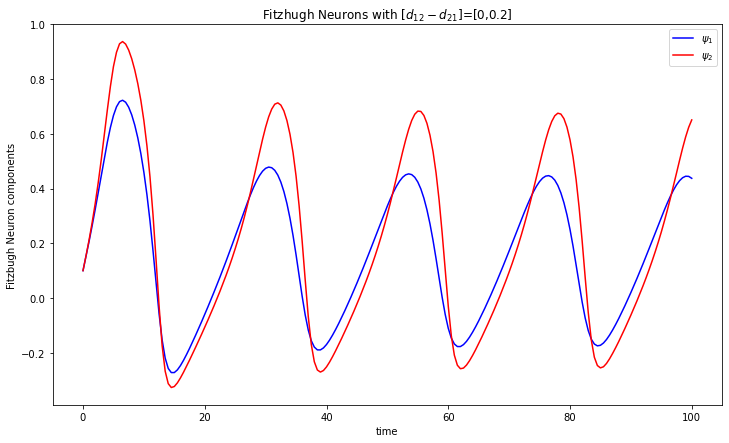

In [13]:
#Plotting the functions

fig, ax = plt.subplots(figsize=(12,7))

plt.plot(sol1.t, sol1.y[0],'b', label = "$\psi_1$")
plt.plot(sol1.t, sol1.y[2],'r', label = "$\psi_2$")


ax.legend(loc='best')
ax.set_xlabel(r'time')
ax.set_ylabel(r'Fitzbugh Neuron components')
ax.set_title('Fitzhugh Neurons with [$d_{12} - d_{21}$]=[0,0.2]')

fig.savefig('3_1.png')
plt.show()

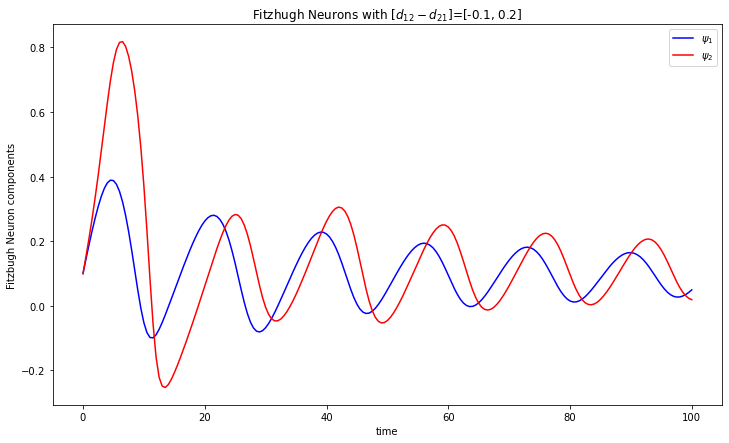

In [14]:
#Plotting the functions

fig, ax = plt.subplots(figsize=(12,7))

plt.plot(sol2.t, sol2.y[0],'b', label = "$\psi_1$")
plt.plot(sol2.t, sol2.y[2],'r', label = "$\psi_2$")


ax.legend(loc='best')
ax.set_xlabel(r'time')
ax.set_ylabel(r'Fitzbugh Neuron components')
ax.set_title('Fitzhugh Neurons with [$d_{12} - d_{21}$]=[-0.1, 0.2]')

fig.savefig('3_2.png')
plt.show()

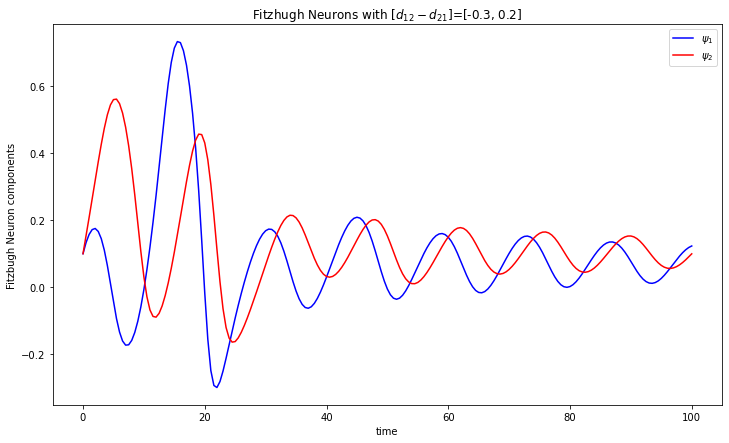

In [15]:
#Plotting the functions

fig, ax = plt.subplots(figsize=(12,7))

plt.plot(sol3.t, sol3.y[0],'b', label = "$\psi_1$")
plt.plot(sol3.t, sol3.y[2],'r', label = "$\psi_2$")


ax.legend(loc='best')
ax.set_xlabel(r'time')
ax.set_ylabel(r'Fitzbugh Neuron components')
ax.set_title('Fitzhugh Neurons with [$d_{12} - d_{21}$]=[-0.3, 0.2]')

fig.savefig('3_3.png')
plt.show()

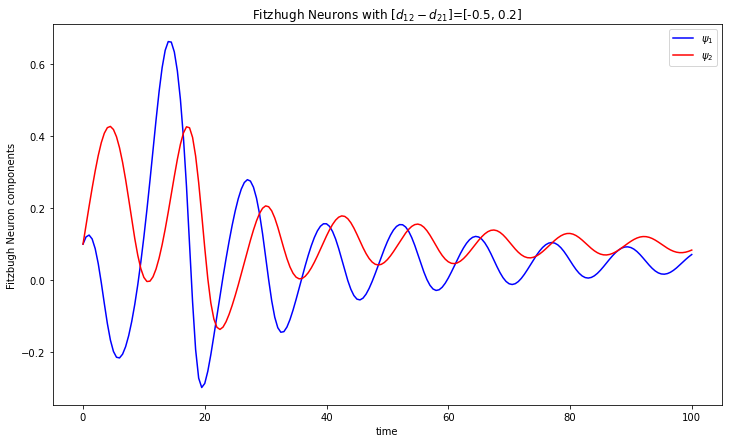

In [16]:
#Plotting the functions

fig, ax = plt.subplots(figsize=(12,7))

plt.plot(sol4.t, sol4.y[0],'b', label = "$\psi_1$")
plt.plot(sol4.t, sol4.y[2],'r', label = "$\psi_2$")


ax.legend(loc='best')
ax.set_xlabel(r'time')
ax.set_ylabel(r'Fitzbugh Neuron components')
ax.set_title('Fitzhugh Neurons with [$d_{12} - d_{21}$]=[-0.5, 0.2]')

fig.savefig('3_4.png')
plt.show()

 ## Q1

In [ ]:
# Problem 1 part a

# ODE and time steps:
#tspan = [0,5]
y0 = np.pi/np.sqrt(2)
delta_t = np.power(2.,-2)

# dydt = f(t,y):
f = lambda t, y: -3*y*np.sin(y)

#Given exact solution
f_exact = lambda t: (np.pi*(np.exp(3*(np.cos(t)-1))))/np.sqrt(2)
delta_t

In [ ]:
#Create the FE function
def ForwardEuler(f, f_exact, y0, tspan, delta_t):
    error = 0
    n = len(tspan)
    FE = y0
    for k in range(int(n)):
        yn = y0 + delta_t*f(tspan[k],y0)
        y0 = yn 
    error = abs(f_exact(5)-yn)
    
    return yn, error

In [ ]:
tspan = np.arange(0.,5.,np.power(2.,-2))
#tspan[0]
#tspan

In [ ]:
n = len(tspan)
    #y = np.zeros(n)
FE = y0

for k in range(int(n)):
        #print(k)
        yn = y0 + delta_t*f(tspan[k],y0)
        #print(yn)
        y0 = yn 

In [ ]:
tspan_list = [np.power(2.,-n) for n in np.arange(2,10,1)]
#tspan_list

In [ ]:
tspan2 = np.arange(0,5,np.power(2.,-2))
FE_2, E_2 = ForwardEuler(f, f_exact, y0, tspan2, np.power(2.,-2))
#print(E_2)

In [ ]:
tspan3 = np.arange(0,5,np.power(2.,-3))
FE_3, E_3 = ForwardEuler(f, f_exact, y0, tspan3, np.power(2.,-3))
#print(E_3)

In [ ]:
tspan4 = np.arange(0,5,np.power(2.,-4))
FE_4, E_4 = ForwardEuler(f, f_exact, y0, tspan4, np.power(2.,-4))
#print(E_4)

In [ ]:
tspa5 = np.arange(0,5,np.power(2.,-5))
FE_5, E_5 = ForwardEuler(f, f_exact, y0, tspan5, np.power(2.,-5))
#print(E_5)

In [ ]:
tspan6 = np.arange(0,5,np.power(2.,-6))
FE_6, E_6 = ForwardEuler(f, f_exact, y0, tspan6, np.power(2.,-6))
#print(E_6)

In [ ]:
tspan7 = np.arange(0,5,np.power(2.,-7))
FE_7, E_7 = ForwardEuler(f, f_exact, y0, tspan7, np.power(2.,-7))
#print(E_7)

In [ ]:
tspan8 = np.arange(0,5,np.power(2.,-8))
FE_8, E_8 = ForwardEuler(f, f_exact, y0, tspan8, np.power(2.,-8))
#print(E_8)
A1 = [FE_8]


In [ ]:
#Problem 2 part a
#Given:
t0 = 0
tf = 32
y0 = np.sqrt(3)
x0 = 1
dt = 0.5

#define the vandepols function
def vdp(t, z):
    x, y = z
    return [y, mu*(1 - x**2)*y - x]

mus = [0.1, 1, 20]
tspan = np.arange(t0,tf+dt,dt)
temp=[]
for mu in mus:
    sol = solve_ivp(vdp, [t0, tf], [y0, x0], t_eval=tspan)
    temp.append(sol.y[0])
#print(temp)

y1=temp[0:1]
y2=temp[1:2]
y3=temp[2:3]

A10_temp = [y1, y2, y3]
A10 = deepcopy(np.transpose(A10_temp))
#A10

In [ ]:
#Problem 2 part b

#Given
y0 = 2
x0 = (np.pi)**2
mu = 1

tols = [np.power(10.,-n) for n in np.arange(4,11,1)]
#print(tols)

#initialising t_avg
t_avgs= []

# RK45
for tol in tols:
        sol = scipy.integrate.solve_ivp(vdp, [0,32], [y0, x0 ], atol=tol, rtol=tol)
        T = sol.t
        Y = sol.y
        #print(T)
        t_avgs.append(np.mean(np.diff(T)))
        
        
#print(t_avgs)  

x_input1 =np.log(t_avgs)
y_input1 =np.log(tols)


#trying to find the best fit line
s1, i1 = np.polyfit(x_input, y_input, 1)
A11 = deepcopy(s1)
#print(A11)


# RK23

#initialising t_avg
t_avgs2= []

for tol in tols:
        sol = scipy.integrate.solve_ivp(vdp, [0,32], [y0, x0 ], atol=tol, rtol=tol, method='RK23')
        T = sol.t
        Y = sol.y
        #print(T)
        t_avgs2.append(np.mean(np.diff(T)))

x_input2 =np.log(t_avgs2)
y_input2 =np.log(tols)

#trying to find the best fit line
s2, i2 = np.polyfit(x_input2, y_input2, 1)
A12 = deepcopy(s2)
#print(A12)



# BDF
#initialising t_avg
t_avgs3= []


for tol in tols:
        sol = scipy.integrate.solve_ivp(vdp, [0,32], [y0, x0 ], atol=tol, rtol=tol, method='BDF')
        T = sol.t
        Y = sol.y
        #print(T)
        t_avgs3.append(np.mean(np.diff(T)))
        
x_input3 =np.log(t_avgs3)
y_input3 =np.log(tols)

#trying to find the best fit line
s3, i3 = np.polyfit(x_input3, y_input3, 1)
A13 = deepcopy(s3)
#print(A13)

In [ ]:
#Problem 3
def sys_rhs(t, y, d12, d21):
    a1 = .05; a2 = .25; b = .01; c = .01; I = .1
    v1,v2,w1,w2 = y#v1,v2,w1,w2
    dv1 = -v1 ** 3 + (1 + a1) * (v1 ** 2) - a1 * v1 - w1 + I + d12*v2
    dw1 = b * v1 - c * w1
    dv2 =- v2 ** 3 + (1 + a2) * (v2 ** 2) - a2 * v2 - w2 + I + d21*v1
    dw2=b * v2 - c * w2
    
    dydt1 = [dv1,dw1]
    dydt2 = [dv2,dw2]
    return  [dv1, dv2, dw1, dw2]#v1,v2,w1,w2

In [ ]:
tspan = np.arange(0, 100, 0.5)

v_in=0
w_in=0

yt0 = [.1, .1, 0, 0]#v1,v2,w1,w2

d12 = 0
d21 = 0
sol_0_0 = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(d12, d21), method='BDF')
A14 = deepcopy(np.transpose(sol_0_0.y))
#print(A14)

In [ ]:
d12 = 0
d21 = 0.2
sol_0_02 = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(d12, d21), method='BDF')
A15 = deepcopy(np.transpose(sol_0_02.y))
#print(A15)

In [ ]:
d12 = -0.1
d21 = 0.2
sol_01_02 = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(d12, d21), method='BDF')
A16 = deepcopy(np.transpose(sol_01_02.y))
#print(A16)

In [ ]:
d12 = -0.3
d21 = 0.2
sol_03_02 = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(d12, d21), method='BDF')
A17 = deepcopy(np.transpose(sol_03_02.y))
#print(A17)

In [ ]:
d12 = -0.5
d21 = 0.2
sol_05_02 = solve_ivp(sys_rhs, tspan, y0 = yt0, args=(d12, d21), method='BDF')
A18 = deepcopy(np.transpose(sol_05_02.y))
#print(A18)